# Analysis and Prediction of S&P 500 index

### Practical Data Science Project Team
<b> Nebadita Nayak nebaditn </b>

<b> Vatsal Rastogi vrastogi </b>

<b> Justin Bobo: jbobo </b>

When studying data science, the best way to learn is to investigate a particular area. In this project, we are going to utilize the time series analysis to predict the S&P 500 indexes.The objective is to explore some of the basic ideas and concepts from time series analysis, and observe their effects when applied to a real world data set. Although it's not possible to actually predict changes in the index using these techniques, the ideas presented here could theoretically be used as part of a larger strategy involving many additional variables to conduct a regression or machine learning effort. Here we present our efforts to predict future price movement of the S&P 500 Index. S&P 500 Index provides a sector with tons of diversity with it being comprised of technology, telecom, materials, real estate, utilities, energy, cons. staples, industrials, cons. discret., health care, and financials. The objective is to develop an algorithm to predict future stock prices based upon the data from the S&P500 Index. This dataset has a time series component that we will strongly leverage and discuss in the next section. More information on time series implementation and usage can be found here. https://en.wikipedia.org/wiki/Time_series

###  Time series

Time series analysis is a branch of statistics that involves reasoning about ordered sequences of related values in order to extract meaningful statistics and other characteristics of the data. It's used in a wide range of disciplines including econometrics, signal processing, weather forecasting, and basically any other field that involves time series data. These techniques are often used to develop models that can be used to attempt to forecast future values of a series, either on their own or in concert with other variables. Time series is an analysis method that can be reasonably applied to real-valued, continuous data, discret numeric data, or discret symbolic data. For our application, we have continuous data that we will be analyzing to determine trends in the S&P 500 Index.

##  Data Collection

To get started, we will send API request to google finance client

<b>Time period of data downloaded</b>: Jan 1st,1970 to Apr 29,2018


We will examine some common techniques used in time series analysis by applying them to a data set containing daily closing values for the S&P 500 stock market index from 1950 up to present day.
### Importing libraries
The following libraries were imported into this notebook. More information on their full functionality can be found at the attached links.

<b> Matplotlib </b> : https://matplotlib.org/

<b> numpy </b> : http://www.numpy.org/

<b> pandas </b> : https://pandas.pydata.org/

<b> statsmodels.api </b> : https://www.statsmodels.org/stable/index.html

<b> seaborn </b> : https://seaborn.pydata.org/

<b> datetime </b> : https://docs.python.org/2/library/datetime.html

<b> Google Finance client </b> : https://pypi.org/project/googlefinance.client/

<b> Facebook's Prohet </b> : https://github.com/facebook/prophet

In [53]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')


In [54]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

param = {
    'q': ".INX", # Stock symbol (ex: "AAPL")
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "INDEXSP", # Stock exchange symbol on which stock is traded (ex: "NASD")
    'p': "50Y" # Period (Ex: "1Y" = 1 year)
}
# get price data (return pandas dataframe)
stock_data = get_price_data(param)
#print(df)

The comma-sepearted value file is read into the notebook and the corresponding head data is provided below

##  Data formatting
File format describes the way information is organized in a computer file. It is important to view the particular data types to get an understanding of the data type as it may need to be manipulated and/or modified for a particular function.

In [55]:
# Check the data types of the date
stock_data.dtypes
stock_data = stock_data.reset_index()
stock_data.rename(columns = {'index': 'Date'}, inplace = True)
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,1970-01-02 16:00:00,92.06,93.54,91.79,93.00,80500
1,1970-01-05 16:00:00,93.00,94.25,92.53,93.46,114900
2,1970-01-06 16:00:00,93.46,93.81,92.13,92.82,114600
3,1970-01-07 16:00:00,92.82,93.38,91.93,92.63,100100
4,1970-01-08 16:00:00,92.63,93.47,91.99,92.68,106700


As we can see from the above results, that the 'Date' column is in 'Object' format, we will first convert the date data into datetime format

In [56]:
stock_data['Date'] =  pd.to_datetime(stock_data['Date'])
stock_data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

Now, that we have changed the date column into the 'datetime' data type, we will now sort the data by the date column and also set it as the index of our dataframe

In [57]:
stock_data = stock_data.sort_index(by = 'Date')
stock_data = stock_data.set_index('Date')

C:\Users\Nebadita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


##  Data Analysis and Exploration

In our data set as we can see we have the opening price, closing price, the highest and the lowest price of the S&P 500 index for a day. However, for the sake of our analysis we will use the 'closing price' as our leading data point. Using this metric, we will look at data from the start of 1950 to date to begin to look to code for trends to be able to find some predictive features.

### Plotting the closing prices over the time
Using closing prices, we plot the dataset over the initial time period that was selected to provide a visualization of the dataset.

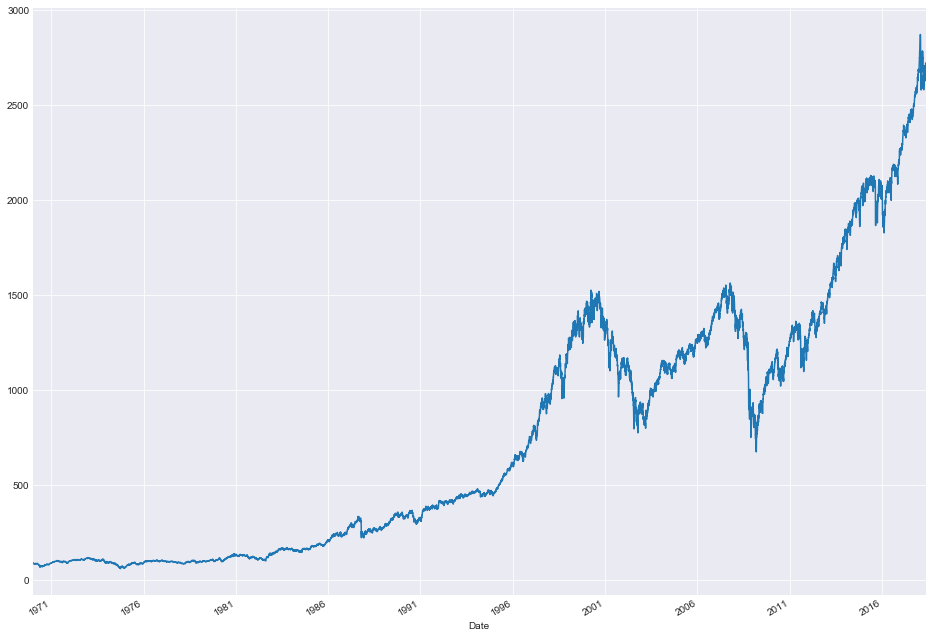

In [58]:
stock_data['Close'].plot(figsize=(16, 12))  

The first obvious thing to note, aside from the two giant dips at the tail end corresponding to the market crashes in 2002 and 2008, is that the data is clearly non-stationary. This makes sense for market data as it tends to go up in the long run more than it goes down. This is a problem for time series analysis though as non-stationary data is hard to reason about. The first thing we can try is a first difference of the series. In other words, subtract the previous value t-1 from the current value t to get the difference d(t). 
Doing this will in theory allow the data to become stationary. Stationary time series has statistical properties that are all constant over time. The data is able to get to stationary form with the use of mathematical transformations. The importance of getting the data into stationary form is that the assumption is that the data can be inferred to be the same in the future as it has been in the past. 

<b> 2002 Market Crash </b>: reference article-http://money.cnn.com/2002/07/19/news/crash2002/

<b> 2008 Market Crash </b>: reference article-https://www.thebalance.com/stock-market-crash-of-2008-3305535

In [59]:
#Create a new column, first difference which containt d(t) - d(t-1)
stock_data['First_Difference'] = stock_data['Close'] - stock_data['Close'].shift()

###  Plot the 'First Difference'
Time series works on the assumption that the data is stationary. 

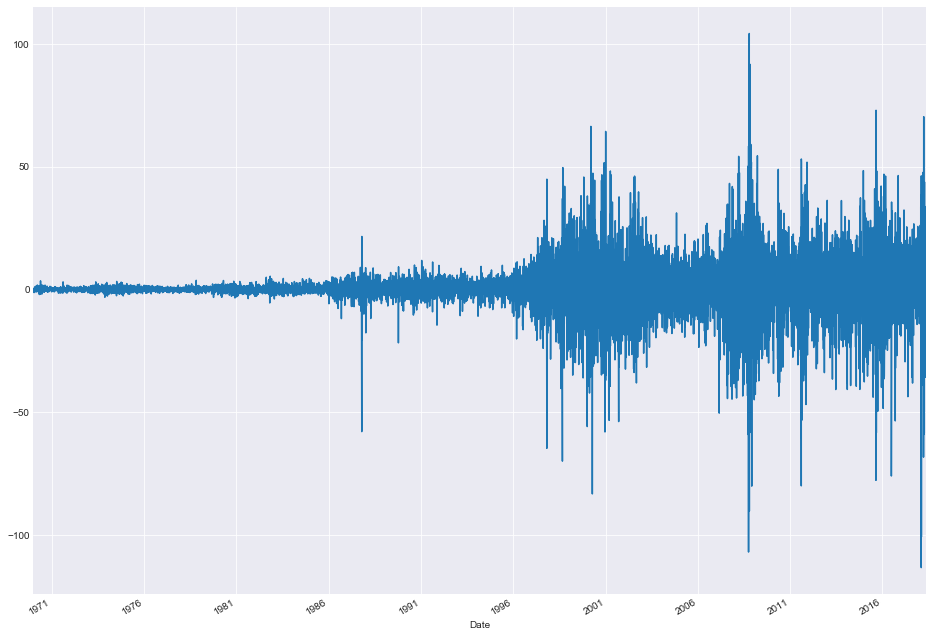

In [60]:
stock_data['First_Difference'].plot(figsize=(16, 12)) 

Although our data no longer appears to be trending up over time and is instead centered around 0, variance of the data steadily increases over time. This is a sign that the data is not only non-stationary but also exponentially increasing. The magnitude of the day-to-day variations at present day completely dwarf the magnitude of the changes in 1950. To deal with this, we'll apply a log transform to the original series.

In [61]:
# Taking log transform of the data
stock_data['Close_Log'] = stock_data['Close'].apply(lambda x: np.log(x))

### Plot the 'Close_log'

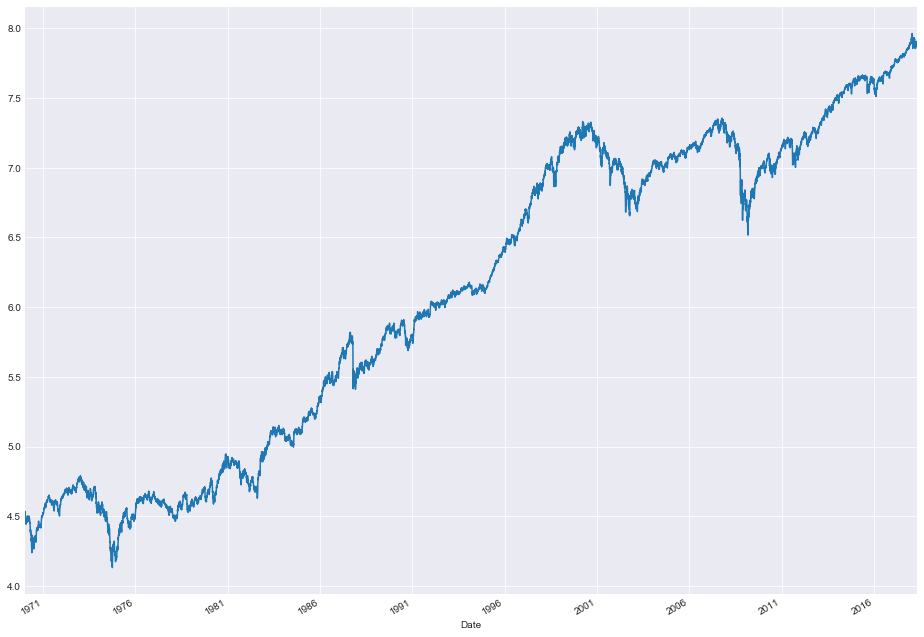

In [62]:
stock_data['Close_Log'].plot(figsize=(16, 12)) 

This gives us the original closing price with a log transform applied to "flatten" the data from an exponential curve to a linear curve. One way to visually see the effect that the log transform had is to analyze the variance over time. We can use a rolling variance statistic and compare both the original series and the logged series.

In [63]:
#Create new column for rolling variance for variance in orignal close price and the variance in the
#log transformed closing price
stock_data['Original_Variance'] = pd.rolling_var(stock_data['Close'], 30, min_periods=None, freq=None, center=True)  
stock_data['Log_Variance'] = pd.rolling_var(stock_data['Close_Log'], 30, min_periods=None, freq=None, center=True)

C:\Users\Nebadita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nebadita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  after removing the cwd from sys.path.


###  Plot the rolling variance

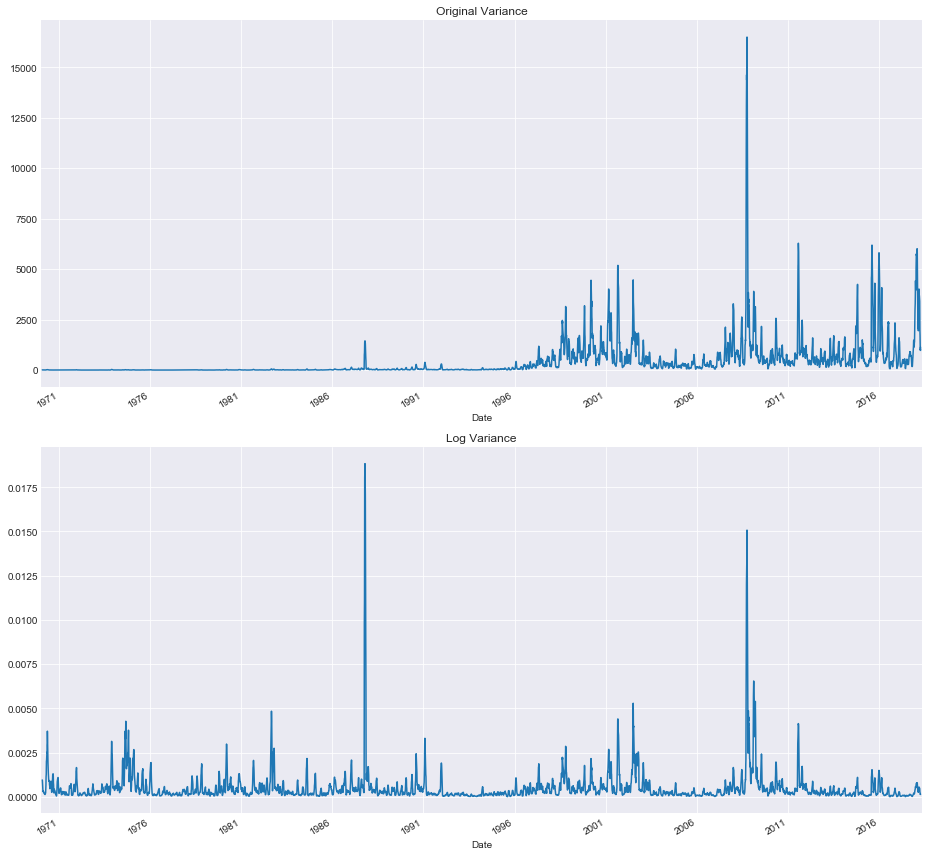

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
stock_data['Original_Variance'].plot(ax=ax[0], title='Original Variance')  
stock_data['Log_Variance'].plot(ax=ax[1], title='Log Variance')  
fig.tight_layout() 

As we can see in the 'Orignal Variance' we can't even see any of the variations until the late 80s. In the bottom graph however it's a different story, changes in the value are clearly visible throughout the entire data set. From this view, it's clear that our transformation has made the variance relatively constant.

Nowe, we will take the log first difference

###  Calculate the first log difference

In [65]:
stock_data['First_Log_Difference'] = stock_data['Close_Log'] - stock_data['Close_Log'].shift()

###  Plot the first log difference

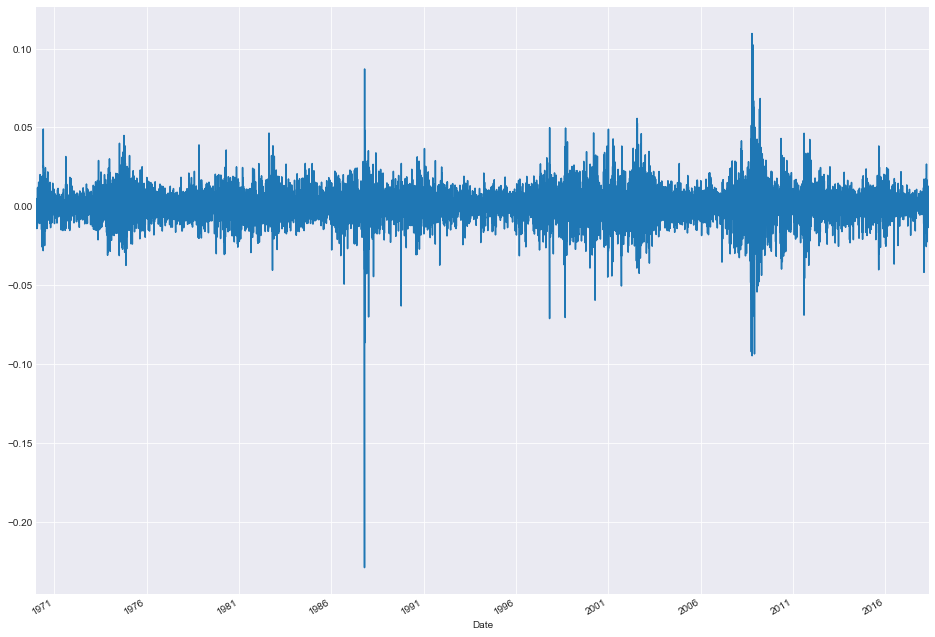

In [66]:
stock_data['First_Log_Difference'].plot(figsize=(16, 12))

We now have a stationary time series model of daily changes to the S&P 500 index. Now we will create some lag variables y(t-1), y(t-2) etc. and examine their relationship to y(t). We'll look at 1 and 2-day lags along with weekly and monthly lags to look for "seasonal" effects.

###  Create different lag columns

In [67]:
#Lag column for 1 day
stock_data['Lag_1'] = stock_data['First_Log_Difference'].shift()
#Lag column for 2 day
stock_data['Lag_2'] = stock_data['First_Log_Difference'].shift(2)
#Lag column for 5 day
stock_data['Lag_5'] = stock_data['First_Log_Difference'].shift(5)  
#Lag column for 30 day
stock_data['Lag_30'] = stock_data['First_Log_Difference'].shift(30) 

One interesting visual way to evaluate the relationship between lagged variables is to do a scatter plot of the original variable vs. the lagged variable and see where the distribution lies. We can do this with a joint plot using the seaborn package. 

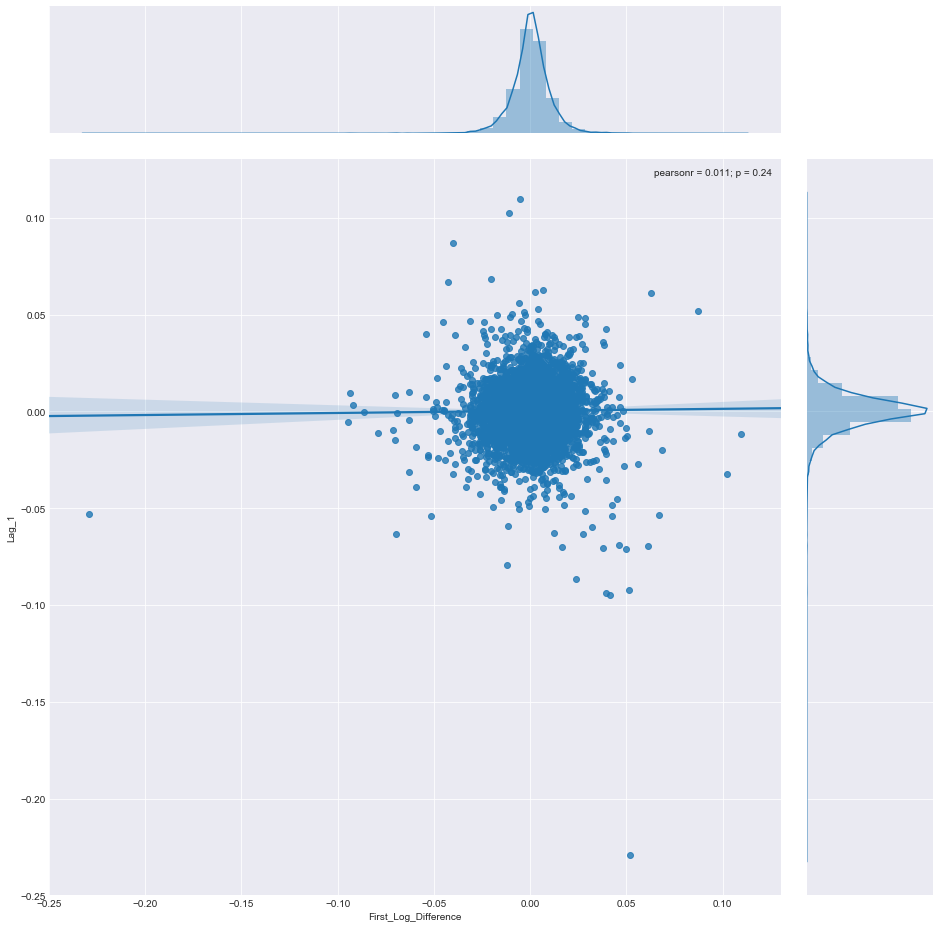

In [68]:
sb.jointplot('First_Log_Difference', 'Lag_1', stock_data, kind='reg', size=13) 

Notice how tightly packed the mass is around 0. It also appears to be pretty evenly distributed - the marginal distributions on both axes are roughly normal. This seems to indicate that knowing the index value one day doesn't tell us much about what it will do the next day.

This is no surprise that there's very little correlation between the change in value from one day to the next.The other lagged variables that we created above also, show similar results as we can see from the below graphs

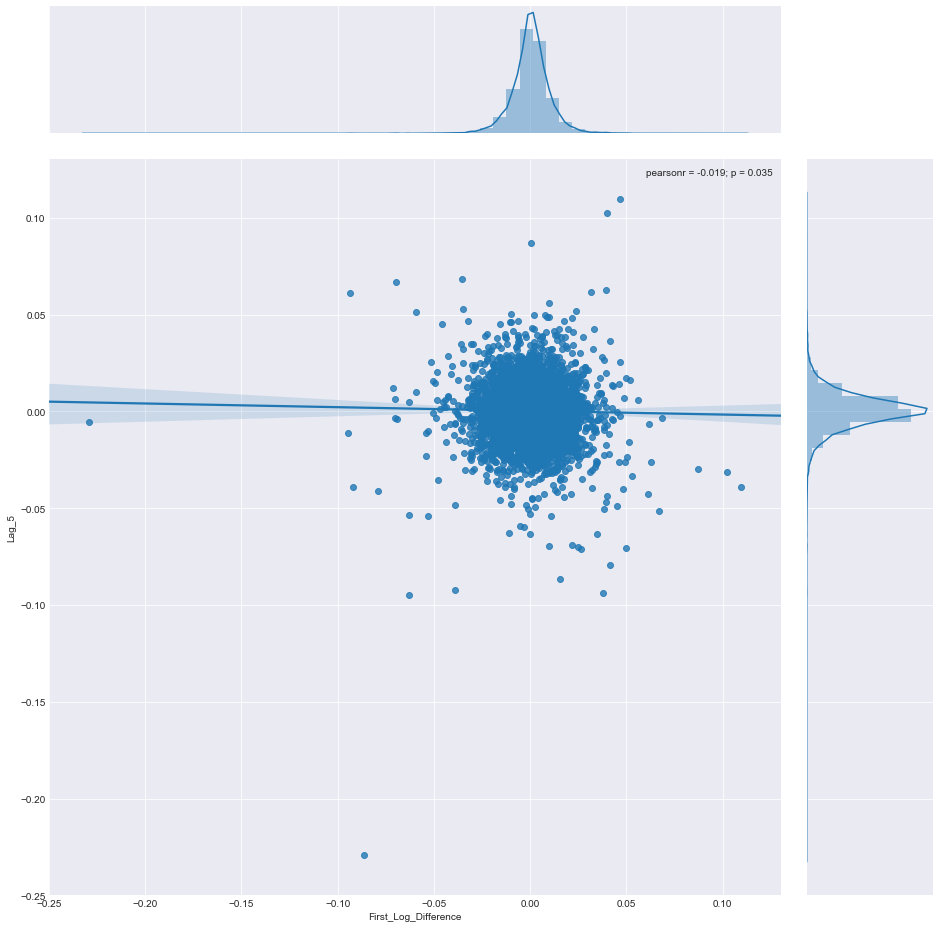

In [69]:
sb.jointplot('First_Log_Difference', 'Lag_5', stock_data, kind='reg', size=13) 

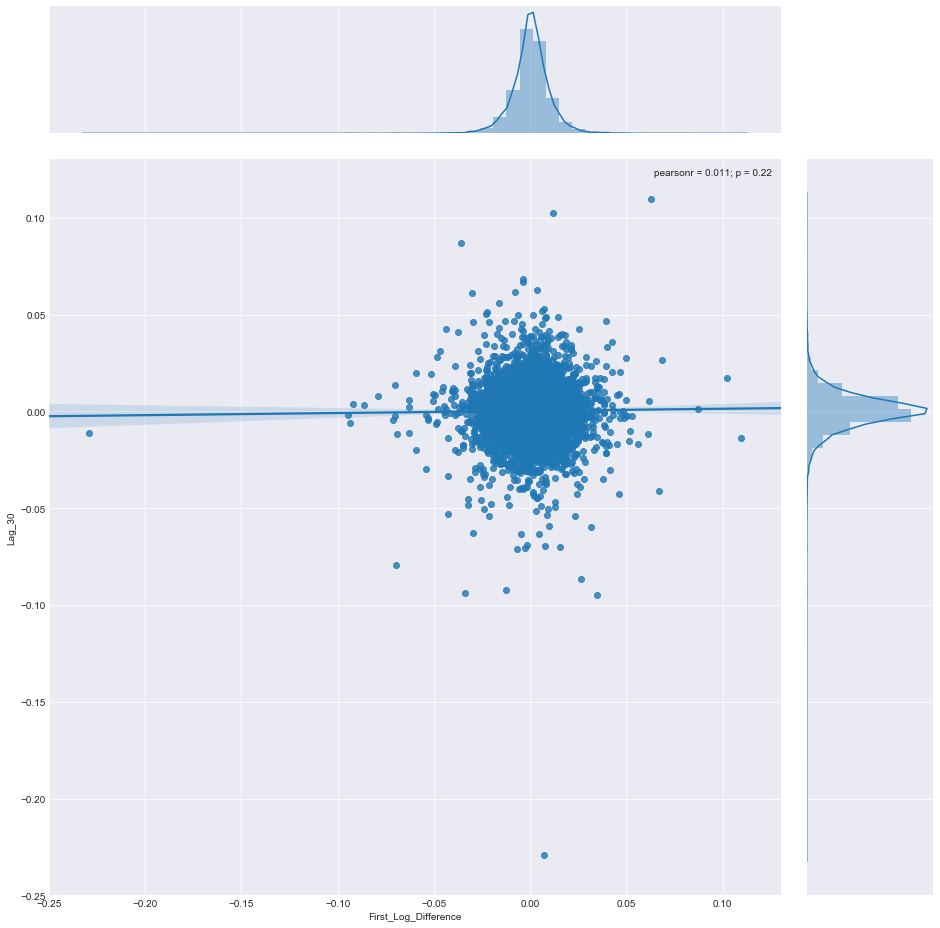

In [70]:
sb.jointplot('First_Log_Difference', 'Lag_30', stock_data, kind='reg', size=13) 

There could be a relationship to other lag steps that we haven't tried, but it's impractical to test every possible lag value manually. Fortunately there is a class of functions that can systematically do this for us.

In [71]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
# Drop Na
stock_data  = stock_data.dropna(subset=['First_Log_Difference'])
lag_correlations = acf(stock_data['First_Log_Difference'].iloc[1:])  
lag_partial_correlations = pacf(stock_data['First_Log_Difference'].iloc[1:])

The auto-correlation function computes the correlation between a variable and itself at each lag step up to some limit. The partial auto-correlation function computes the correlation at each lag step that is NOT already explained by previous, lower-order lag steps. We can plot the results to see if there are any significant correlations.

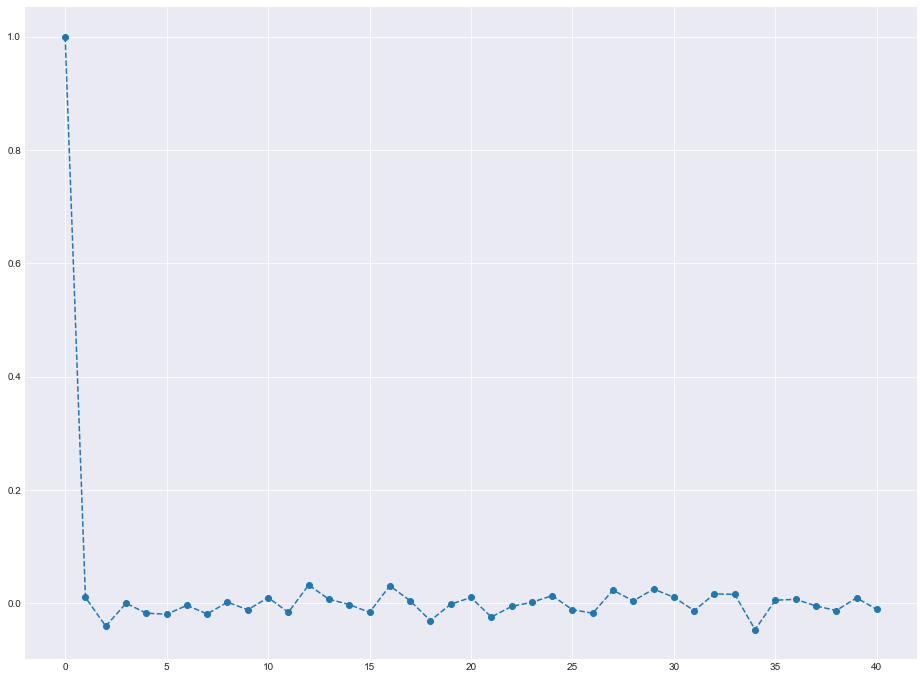

In [72]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')

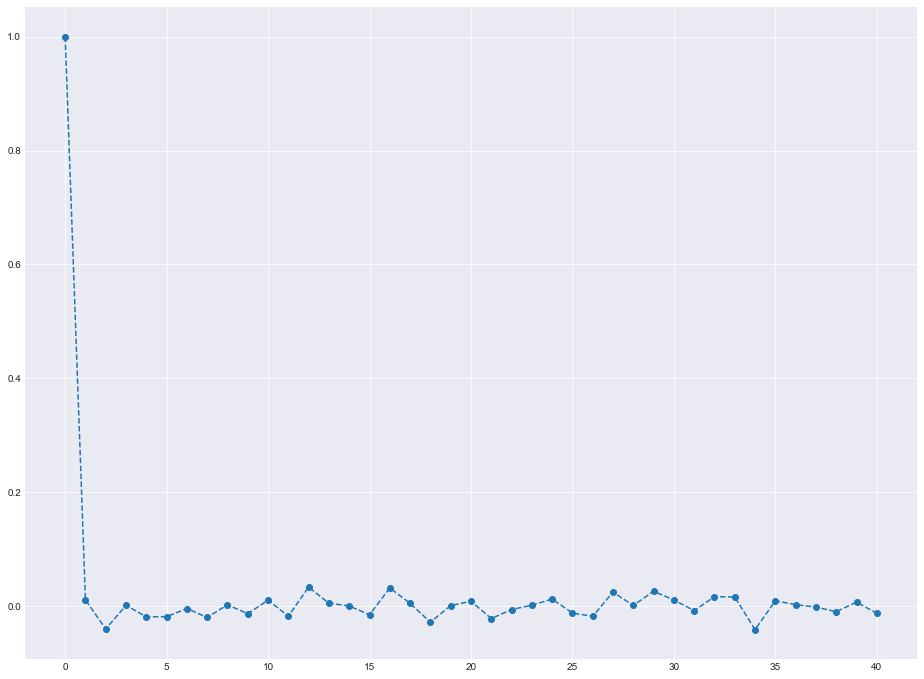

In [73]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_partial_correlations, marker='o', linestyle='--')

The auto-correlation and partial-autocorrelation results are very close to each other . This shows is that there is no significant (> 0.2) correlation between the value at time t and at any time prior to t up to 40 steps behind. In order words, the series is a random walk.

Another interesting technique we can try is a decomposition. This is a technique that attempts to break down a time series into trend, seasonal, and residual factors. Statsmodels comes with a decompose function out of the box.

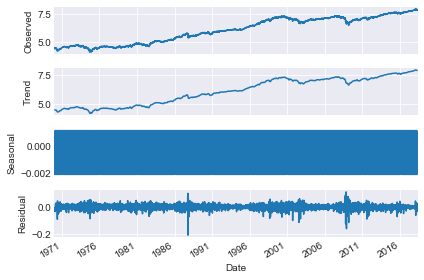

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_data['Close_Log'], model='additive', freq=30)  
fig = plt.figure()  
fig = decomposition.plot()

Since we don't see any real cycle in the data, the visualization is not that effective in this case. For data where this is a strong seasonal pattern though it can be very useful.

Going back to our stock data, we're already observed that it's a random walk and that our lagged variables don't seem to have much impact, but we can still try fitting some ARIMA models and see what we get. Let's start with a simple moving average model.

,Close_Log,Forecast
Date,,
1970-01-05 16:00:00,4.537534,NaN
1970-01-06 16:00:00,4.530662,6.203576
1970-01-07 16:00:00,4.528613,4.530700
1970-01-08 16:00:00,4.529153,4.528650
1970-01-09 16:00:00,4.526127,4.529190


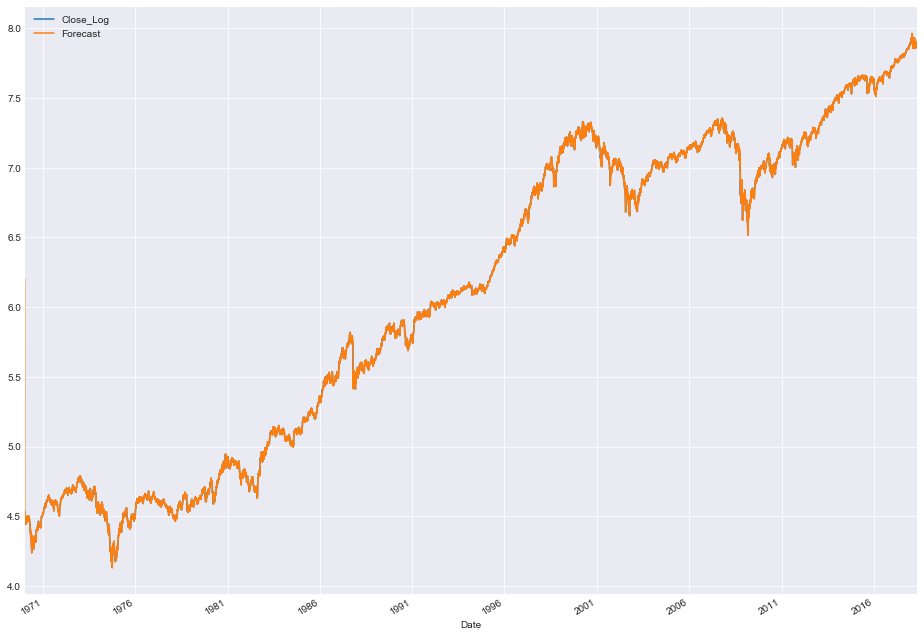

In [75]:
model = sm.tsa.ARIMA(stock_data['Close_Log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues
stock_data[['Close_Log', 'Forecast']].plot(figsize=(16, 12))
stock_data[['Close_Log', 'Forecast']].head()

At first glance it seems like this model is doing pretty well. But although it appears like the forecasts are really close (the lines are almost indistinguishable after all), remember that we used the un-differenced series! The index only fluctuates a small percentage day-to-day relative to the total absolute value. What we really want is to predict the first difference, or the day-to-day moves. We can either re-run the model using the differenced series, or add an "I" term to the ARIMA model (resulting in a (1, 1, 0) model) which should accomplish the same thing. Let's try using the differenced series.

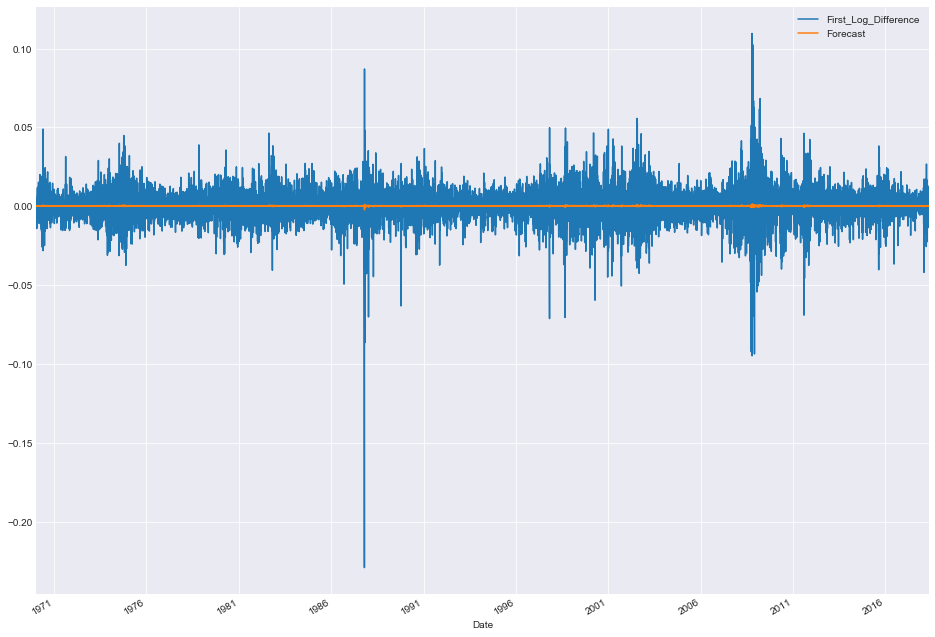

In [76]:
model = sm.tsa.ARIMA(stock_data['First_Log_Difference'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock_data['Forecast'] = results.fittedvalues  
stock_data[['First_Log_Difference', 'Forecast']].plot(figsize=(16, 12)) 

It appears like our forecasted changes are generally much smaller than the actual changes. Hence we would take a closer look at a subset of the data to see what's really going on

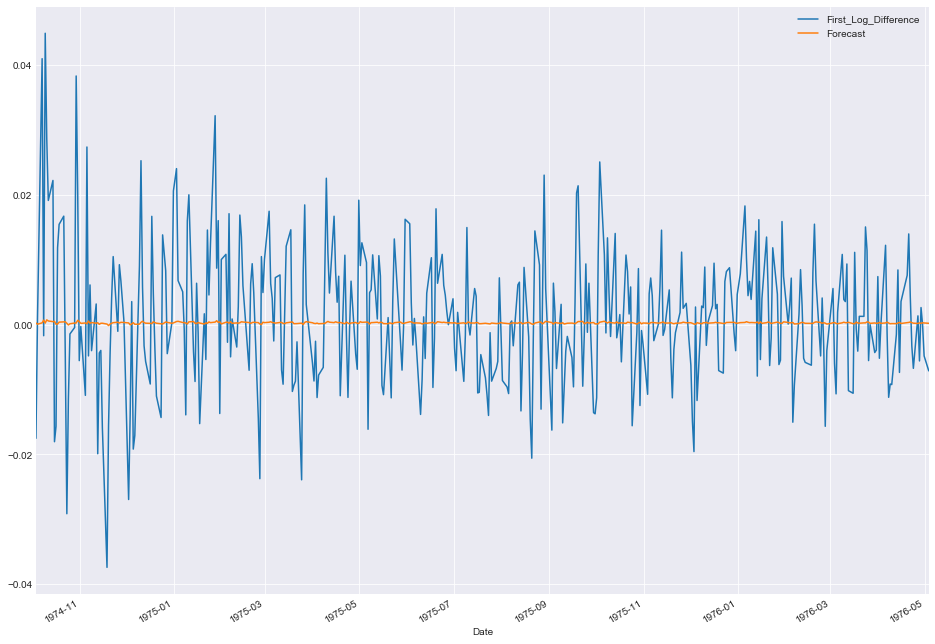

In [77]:
stock_data[['First_Log_Difference', 'Forecast']].iloc[1200:1600, :].plot(figsize=(16, 12))  

It's pretty obvious that the forecast is way off. We're predicting tiny little variations relative to what is actually happening day-to-day. Again, this is more of less expected with a simple moving average model of a random walk time series. There's not enough information from the previous days to accurately forcast what's going to happen the next day.

## Now, we would explore the Stock data using the Prophet library

In [78]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [79]:
#Prepare data for Prophet
df_orig = stock_data.reset_index()[['Date', 'Close']]
df_orig = df_orig.rename(columns = {'Date':'ds'})
df_orig.set_index('ds', inplace = True)

df = df_orig.reset_index().rename(columns = {'Date':'ds','Close':'y'})
#Consider data only from 2017
df = df[pd.DatetimeIndex(df['ds']).year > 2014]
df['y'] = np.log(df['y'])

### Running Prophet

In [80]:
model = Prophet(growth='linear')
model.fit(df)
future = model.make_future_dataframe(periods = 365) #Forecasting from 1 year from trained data
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Plotting the forecasts
Stock market forecasting tries to determine the future value of a given trend that is traded on an exchange platform. The successful implementation of such a scheme is almost like the "holy grail" (https://www.merriam-webster.com/dictionary/Holy%20Grail) as it is hard to obtain. Below are the forecasting results that are generated by the given model.

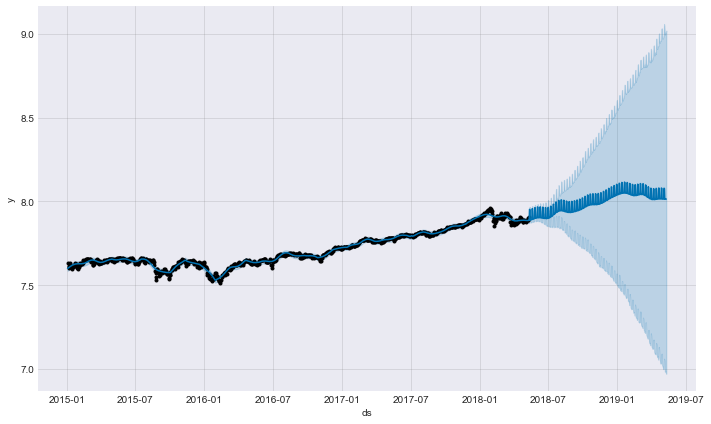

In [81]:
figure = model.plot(forecast)
#model.plot_components(forecast);

With the data that we have, it is hard to see how good/bad the forecast (blue line) is compared to the actual data (black dots). Let's take a look at the last 800 data points (~2 years) of forecast vs actual without looking at the future forecast (because we are just interested in getting a visual of the error between actual vs forecast).

In [82]:
#df_orig.set_index('ds',inplace=True)
two_years = forecast.set_index('ds').join(df_orig)
two_years = two_years[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)

In [83]:
two_years.tail()

,Close,yhat,yhat_upper,yhat_lower
ds,,,,
2018-05-04 16:00:00,2663.42,7.886054,7.902049,7.871713
2018-05-07 16:00:00,2672.63,7.885821,7.901677,7.871031
2018-05-08 16:00:00,2671.92,7.885650,7.900219,7.871419
2018-05-09 16:00:00,2697.79,7.886578,7.901158,7.872194
2018-05-10 16:00:00,2723.07,7.886735,7.902374,7.872359


In [84]:
two_years = forecast.set_index('ds').join(df_orig)
two_years = two_years[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)

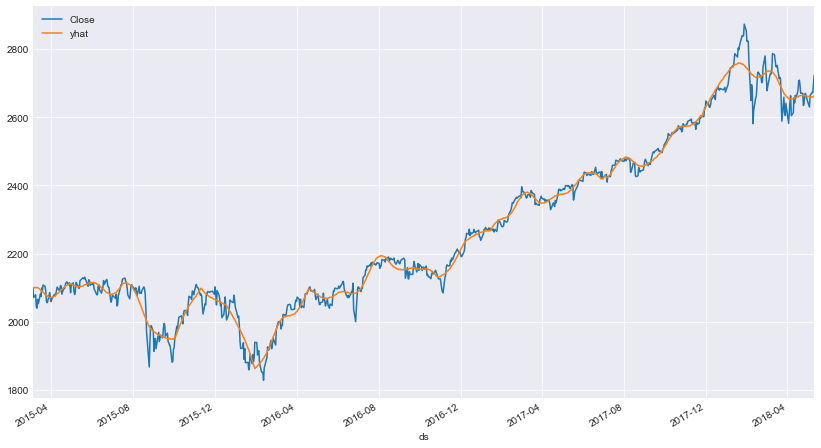

In [85]:
two_years[['Close','yhat']].plot(figsize=(14, 8))

Forecast follows the trend quite well but doesn't seem to that great at catching the 'volatility' of the market.

Lets check accuracy

In [86]:
two_years_AE = (two_years.yhat - two_years.Close)
print(two_years_AE.describe())

count    800.000000
mean       0.072490
std       25.847610
min     -120.956200
25%      -14.124614
50%       -1.274688
75%       13.769773
max      142.110230
dtype: float64


Checking the R Square scores

In [87]:
r2_score(two_years.Close, two_years.yhat)

0.98902128541261591

Mean square error

In [88]:
mean_squared_error(two_years.Close, two_years.yhat)

667.26904984886437

An MSE of 669.496 for a model that is trying to predict the S&P500 with values between 1900 and 2500 isn't that good .If you are trying to predict exact changes and movements up/down.

Now, let's look at the mean absolute error (MAE). The MAE is the measurement of absolute error between two continuous variables and can give us a much better look at error rates than the standard mean.

Text(0.5,0,'Date')

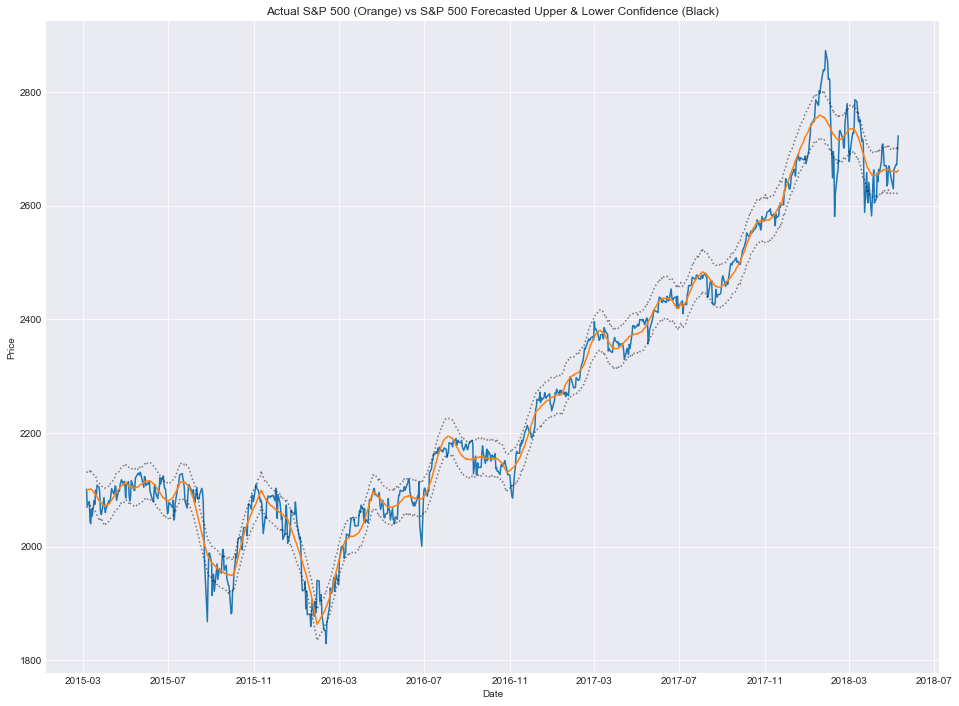

In [89]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16,12)
ax1.plot(two_years.Close)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In the above chart, we can see the forecast (in blue) vs the actuals (in orange) with the upper and lower confidence bands in gray.

You can't really tell anything quantifiable from this chart, but you can make a judgement on the value of the forecast. If you are trying to trade short-term (1 day to a few weeks) this forecast is almost useless but if you are investing with a timeframe of months to years, this forecast might provide some value to better understand the trend of the market and the forecasted trend.

Let's go back and look at the actual forecast to see if it might tell us anything different than the forecast vs the actual data.

In [90]:
full_df = forecast.set_index('ds').join(df_orig)
full_df['yhat']=np.exp(full_df['yhat'])

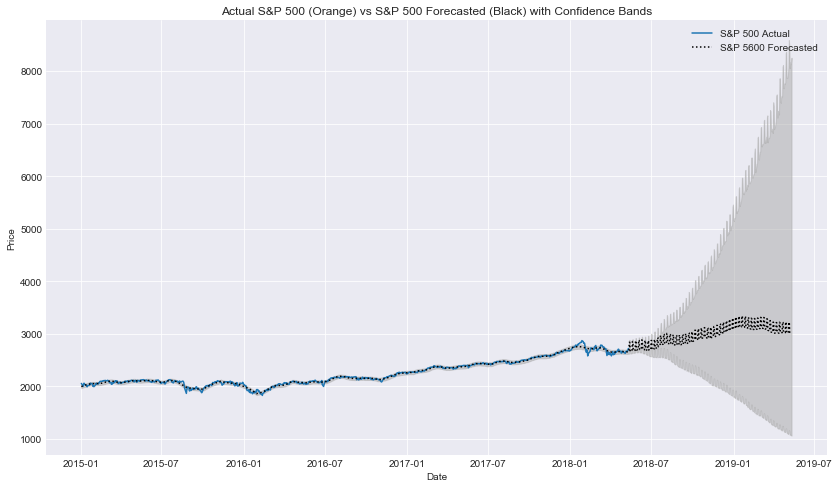

In [91]:
fig, ax1 = plt.subplots()
fig.set_size_inches(14,8)
ax1.plot(full_df.Close)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted (Black) with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('S&P 500 Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('S&P 5600 Forecasted') #change the legend text for 2nd plot

We can see throughout the history of the actuals vs forecast, that prophet does an OK job forecasting but has trouble with the areas when the market become very volatile.

Looking specifically at the future forecast, prophet is telling us that the market is going to continue rising and should be around 2750 at the end of the forecast period, with confidence bands stretching from 2000-ish to 4000-ish.

If you show this forecast to any serious trader / investor, they'd quickly shrug it off as a terrible forecast. Anything that has a 2000 point confidence interval is worthless in the short- and long-term investing world.
Maybe we can use the forecast on weekly or monthly data with better accuracy. Or...maybe we can use the forecast combined with other forecasts to make a better forecast.

# Conclusion
This notebook aimed to showcase how the time series component of stock data, particularly S&P 500 Index data, can be utilized to gain some insight into the future projections of the dataset. Processes were implemented to bring the dataset from unstationarity to a stationary form which allows the assumption that future projections can be inferred to have the same trend has the past data. Modifying the data to showcase first difference, close log, rolling variance, and first log difference work to bring the data stationary. From this, several analytical models are generated to ultimately showcase the future forecasted price prediction(s). The model did not return a realiable confidence intervals as it yielded a 2000 point confidence interval. This is way too wide of a margin to accuractely justify the bounds. The trend however does continue to rise which follows the pattern of prior data. 

The model also is limited to not being able to predict any random news reports/public speeches that could sway the price points. This is not possible with our model.